In [3]:
import numpy as np
import pandas as pd
from scipy import integrate

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (4,3)

# produce vector inline graphics
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

# Uniaxial tensile tests

Text(0.5, 1.0, 'Uniaxial')

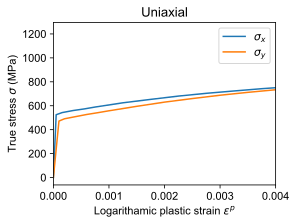

In [4]:
uniaxial = pd.read_csv('uniaxial test data.csv')

plt.plot(uniaxial['x plastic strain'], uniaxial['x true stress'], label=r'$\sigma_x$')
plt.plot(uniaxial['y plastic strain'], uniaxial['y true stress'], label=r'$\sigma_y$')

plt.xlim([0,0.004])
plt.xlabel(r'Logarithamic plastic strain $\varepsilon^p$')
plt.ylabel(r'True stress $\sigma$ (MPa)')
plt.legend()
plt.title(r'Uniaxial')

## Integrate $\sigma_x \varepsilon^p_x$ curve to get $ W_0 = \int_0^{\varepsilon_0^p} \sigma_x d\varepsilon_x^p$

actual ep0 = 0.00476
sigma0 = 774.941, W0 = 3.195


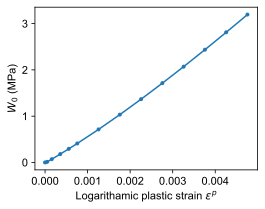

In [121]:
# plastic strain amount to integrate
EP0 = 0.5 / 100

# find array indices until cutoff point
cutoff = uniaxial['x plastic strain']<=EP0

ep0_W0 = integrate.cumtrapz(uniaxial['x true stress'][cutoff], uniaxial['x plastic strain'][cutoff], initial=0)

plt.plot(uniaxial['x plastic strain'][cutoff], ep0_W0, '.-')

sigma0 = max(uniaxial['x true stress'][cutoff])
W0 = max(ep0_W0)

plt.xlabel(r'Logarithamic plastic strain $\varepsilon^p$')
plt.ylabel(r'$W_0$ (MPa)')

print('actual ep0 = %5.5f' %max(uniaxial['x plastic strain'][cutoff]))
print('sigma0 = %5.3f, W0 = %5.3f' %(sigma0, W0))

## Calculate $\sigma_y^Y$ by work equivalence principle

sigma_y = 752.235


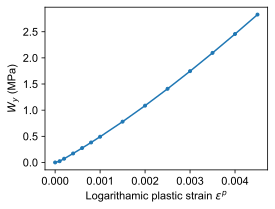

In [122]:
# integrate until the end and find cutoff point at Wy<=W0
Wy = integrate.cumtrapz(uniaxial['y true stress'], uniaxial['y plastic strain'], initial=0)

cutoff = Wy <= W0

plt.plot(uniaxial['y plastic strain'][cutoff], Wy[cutoff], '.-')

plt.xlabel(r'Logarithamic plastic strain $\varepsilon^p$')
plt.ylabel(r'$W_y$ (MPa)')

print('sigma_y = %5.3f' % max(uniaxial['y true stress'][cutoff]))

## Calculate biaxial yield point by work equivalence principle

### $\sigma_x : \sigma_y = 2:1$

#### Trial 1

In [123]:
two_one_1 = pd.read_csv('2vs1_trial 1.csv')
two_one_1.head()

,x plastic strain,x true stress,y plastic strain,y true stress
0,0.000000,0.00000,0.000000,0.00000
1,0.000047,0.00602,0.000107,-0.25761
2,0.000047,0.16437,0.000104,0.62305
3,0.000047,0.22325,0.000103,-0.50786
4,0.000047,0.22615,0.000098,0.44111


In [124]:
def plot_biaxial(biaxial_):
    plt.plot(biaxial_['x plastic strain'], biaxial_['x true stress'], label=r'$\sigma_x$')
    plt.plot(biaxial_['y plastic strain'], biaxial_['y true stress'], label=r'$\sigma_y$')

    plt.vlines(EP0, plt.ylim()[0], plt.ylim()[1], 'grey', 'dashed')
    plt.annotate(r'$\varepsilon_0^p$', (EP0, plt.ylim()[1]/10))

    plt.xlabel(r'Logarithamic plastic strain $\varepsilon^p$')
    plt.ylabel(r'True stress $\sigma$ (MPa)')
    plt.legend()
    plt.xlim([-0.001,EP0*2])
    plt.title(r'$\sigma_x : \sigma_y = 2:1$ (trial 1)')
    plt.show()

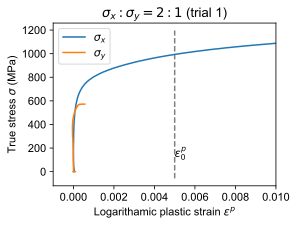

In [125]:
plot_biaxial(two_one_1)

In [126]:
def find_yieldpoint_biaxial(biaxial_):
    Wx = integrate.cumtrapz(biaxial_['x true stress'], biaxial_['x plastic strain'], initial=0)
    Wy = integrate.cumtrapz(biaxial_['y true stress'], biaxial_['y plastic strain'], initial=0)

    #! IMPORTANT: the following addition assumes the same row of Wx and Wy represents a single physical state
    Wadd = Wx + Wy

    cutoff = Wadd <= W0

    plt.plot(biaxial_['x plastic strain'][cutoff], Wx[cutoff], '-', label='Wx')
    plt.plot(biaxial_['y plastic strain'][cutoff], Wy[cutoff], '-', label='Wy')

    plt.xlabel(r'Logarithamic plastic strain $\varepsilon^p$')
    plt.ylabel('W')
    plt.legend()

    Sx = max(biaxial_['x true stress'][cutoff])
    Sy = max(biaxial_['y true stress'][cutoff])

    print('sigma_x = %5.3f, sigma_y = %5.3f' %(Sx, Sy))

sigma_x = 955.847, sigma_y = 478.647


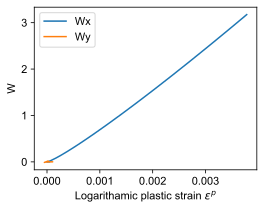

In [127]:
find_yieldpoint_biaxial(two_one_1)

#### Trial 2

In [128]:
two_one_2 = pd.read_csv('2vs1_trial 2.csv')

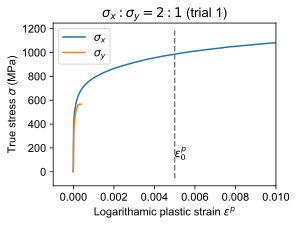

In [129]:
plot_biaxial(two_one_2)

sigma_x = 948.811, sigma_y = 474.864


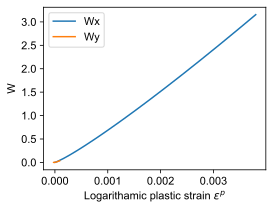

In [130]:
find_yieldpoint_biaxial(two_one_2)

### $\sigma_x : \sigma_y = 1:2$

#### Trial 1

In [131]:
one_two_1 = pd.read_csv('1vs2_trial 1.csv')

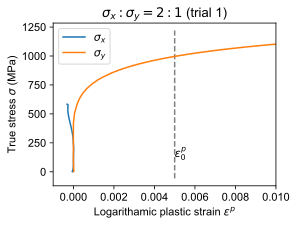

In [132]:
plot_biaxial(one_two_1)

sigma_x = 481.694, sigma_y = 961.698


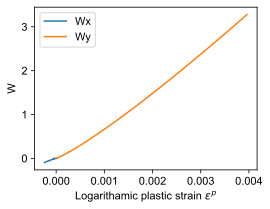

In [133]:
find_yieldpoint_biaxial(one_two_1)

#### Trial 2

In [134]:
one_two_2 = pd.read_csv('1vs2_trial 2.csv')

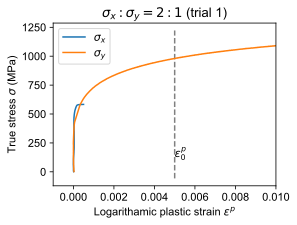

In [135]:
plot_biaxial(one_two_2)

sigma_x = 471.407, sigma_y = 944.927


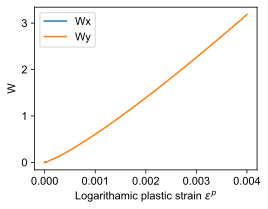

In [136]:
find_yieldpoint_biaxial(one_two_2)